# T3 - International Visitors Arrival Analysis by Age Groups

## Overview of Analysis

#### 1. prepare the data
#### 2. Overall Performance of different Age Groups
Findings: \
The age group of 25-34 years has the highest number of travelers, with 235 thousand visitors per month (22%), 
while the 15-19 years group has the lowest which is 37 thousand and 4%.

#### 3. The Trend of visitors of Age Groups（Anunaly、Quaterly and Monthly）
Findings: \
The overall trend for each age group has been upward. From 2008 to 2019, the growth was relatively stable with only minor fluctuation.  However, the COVID-19 pandemic caused a sharp decline between 2019 an 2022.  Visitor numbers began to recover in 2023, but have not yet returned to the peak levels of 2019

For the age group '65 and over', the number of visitors began to exceed that of the '20-24 years' group starting in 2014. However, when examining these two groups on a quarterly and monthly basis, some interesting phenomena can be observed. In certain specific quarters and months, the '20-24 years' group still has higher numbers than the '65 and over' group.

#### 4. Changing Point: '20-24 Years' vs. '65 & Over'
Findings: \
When we examine these two groups in detail, we find that, particularly in Q3, the number of visitors in the '20-24 years' age group consistently exceeds that of the '65 and over' group. This indicates that visitor numbers vary seasonally across different age groups.

#### 5. Seasonal Pattern Across Different Age Groups
Findings: \In the age groups under 24, Q3 is the season with the highest number of visitors, whereas in the older age groups more than 55, Q3 is the season with the lowest number of visitors. And in the age groups 25-54, visitor numbers are evenly spread across each season and show minimal fluctuation.

Younger individuals might take advantage of the summer vacation for travel and leisure activities, leading to higher visitor numbers. In contrast, older adults might prefer to visit Singapore during Q1 and Q4 when the weather is warmer that their own countries..
#### 6、Monthly Patterns Across Different Age Groups
As with the previous finding，in the younger age groups, July and August are the months with the highest number of visitors, whereas in the older age groups, those two have the lowest number of visitors..

# 1、Prepare the Data

In [5]:
# Read the data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_excel('travel_inbound.xlsx',sheet_name='T3',skiprows=10)
df=df.loc[3:11].set_index('Data Series')
df=df.transpose()
df.index = pd.to_datetime(df.index, format='%Y %b')
df['Year'] = df.index.year
df['Quater'] = df.index.to_period('Q')
df['Month'] = df.index.to_period('M')
df

Data Series,Under 15 Years,15-19 Years,20-24 Years,25-34 Years,35-44 Years,45-54 Years,55-64 Years,65 & Over,Not Stated,Year,Quater,Month
2024-05-01,100712.0,36690.0,77505.0,292535.0,275080.0,203332.0,171762.0,125461.0,0.0,2024,2024Q2,2024-05
2024-04-01,129866.0,42879.0,76475.0,295704.0,280423.0,209734.0,178311.0,142274.0,0.0,2024,2024Q2,2024-04
2024-03-01,100339.0,45455.0,101226.0,363206.0,273214.0,211083.0,204956.0,181054.0,0.0,2024,2024Q1,2024-03
2024-02-01,146319.0,45974.0,87869.0,294411.0,286244.0,213147.0,196204.0,166411.0,0.0,2024,2024Q1,2024-02
2024-01-01,141869.0,55645.0,97787.0,302584.0,285596.0,216583.0,184148.0,152202.0,0.0,2024,2024Q1,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-05-01,54648.0,22357.0,57002.0,199571.0,192780.0,153796.0,101502.0,49991.0,1957.0,2008,2008Q2,2008-05
2008-04-01,49330.0,19998.0,51674.0,194517.0,192085.0,157544.0,106607.0,55842.0,1841.0,2008,2008Q2,2008-04
2008-03-01,55635.0,23576.0,61040.0,207814.0,199868.0,166022.0,121051.0,73515.0,2114.0,2008,2008Q1,2008-03
2008-02-01,51348.0,23820.0,60680.0,186124.0,181599.0,147720.0,101764.0,57564.0,2409.0,2008,2008Q1,2008-02


In [6]:
# show the basic information of data, clean the data if needed
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2024-05-01 to 2008-01-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   Under 15 Years  197 non-null    object       
 1   15-19 Years     197 non-null    object       
 2   20-24 Years     197 non-null    object       
 3   25-34 Years     197 non-null    object       
 4   35-44 Years     197 non-null    object       
 5   45-54 Years     197 non-null    object       
 6   55-64 Years     197 non-null    object       
 7   65 & Over       197 non-null    object       
 8   Not Stated      197 non-null    object       
 9   Year            197 non-null    int32        
 10  Quater          197 non-null    period[Q-DEC]
 11  Month           197 non-null    period[M]    
dtypes: int32(1), object(9), period[M](1), period[Q-DEC](1)
memory usage: 19.2+ KB


In [7]:
#Data cleaning: change those columns that are objects to float
cols_to_convert = ['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']
df[cols_to_convert] = df[cols_to_convert].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2024-05-01 to 2008-01-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   Under 15 Years  197 non-null    float64      
 1   15-19 Years     197 non-null    float64      
 2   20-24 Years     197 non-null    float64      
 3   25-34 Years     197 non-null    float64      
 4   35-44 Years     197 non-null    float64      
 5   45-54 Years     197 non-null    float64      
 6   55-64 Years     197 non-null    float64      
 7   65 & Over       197 non-null    float64      
 8   Not Stated      197 non-null    object       
 9   Year            197 non-null    int32        
 10  Quater          197 non-null    period[Q-DEC]
 11  Month           197 non-null    period[M]    
dtypes: float64(8), int32(1), object(1), period[M](1), period[Q-DEC](1)
memory usage: 19.2+ KB


# 2、Overall Performance  of different Age Groups

In [9]:
#Prepare the data for plotting
mean_values = df[['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']].mean()
df_mean=pd.DataFrame(mean_values).reset_index()
df_mean.columns = ['Age Group', 'Average']
df_mean['Average'] = df_mean['Average']/1000
df_mean['Prop']=df_mean['Average']/(df_mean['Average'].sum())
df_mean['Prop']=df_mean['Prop']
print(df_mean)

        Age Group     Average      Prop
0  Under 15 Years   95.455457  0.091160
1     15-19 Years   37.067345  0.035399
2     20-24 Years   71.972878  0.068734
3     25-34 Years  234.734198  0.224172
4     35-44 Years  218.221051  0.208402
5     45-54 Years  176.630614  0.168683
6     55-64 Years  132.250010  0.126299
7       65 & Over   80.783426  0.077149


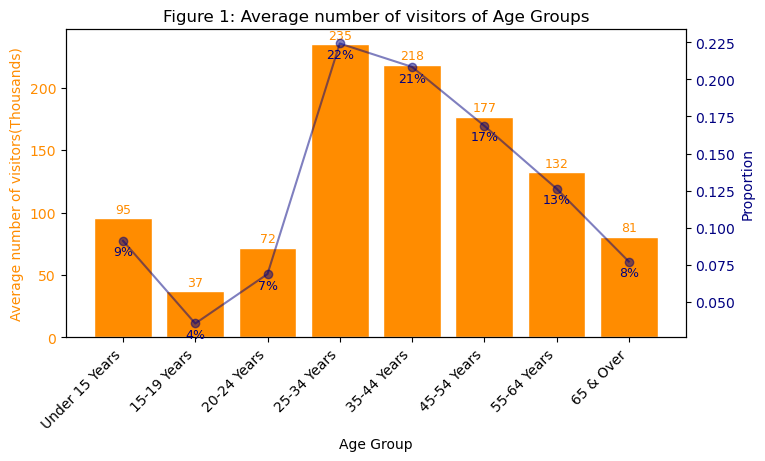

In [10]:
#Plotting
x = df_mean['Age Group']
y1 = df_mean['Average']
y2 = df_mean['Prop']

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the bar chart for 'Average'
ax1.bar(x, y1, facecolor='darkorange', edgecolor='white', label='Average')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average number of visitors(Thousands)', color='darkorange')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax1.set_xticks(x) 
ax1.set_xticklabels(x, rotation=45, ha='right') 
plt.title('Figure 1: Average number of visitors of Age Groups')

# Add text labels on the bars
for xi, yi in zip(x, y1):
    ax1.text(xi, yi + 2, f'{yi:.0f}', ha='center', va='bottom', fontsize=9,color='darkorange')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, marker='o', color='navy', alpha=0.5, label='Proportion')
ax2.set_ylabel('Proportion', color='navy')
ax2.tick_params(axis='y', labelcolor='navy')

# Add text labels on the plots
for xi, yi in zip(x, y2):
    ax2.text(xi, yi-0.012, f'{yi*100:.0f}%', ha='center', va='bottom', fontsize=9,color='navy')

#### Findings 1 
The age group of 25-34 years has the highest number of travelers, with 235 thousand visitors per month (22%), 
while the 15-19 years group has the lowest which is 37 thousand and 4%.

# 3、The trend of visitors of Age Groups

## 3.1 Annual trend

In [14]:
#Prepare the data for plotting
df1=df.groupby([df.Year])[['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']].sum()
df1

Data Series,Under 15 Years,15-19 Years,20-24 Years,25-34 Years,35-44 Years,45-54 Years,55-64 Years,65 & Over
Year,,,,,,,,
2008,736695.0,361227.0,758970.0,2377883.0,2251392.0,1811671.0,1186162.0,609502.0
2009,738696.0,331790.0,718632.0,2256644.0,2084789.0,1727057.0,1180647.0,623677.0
2010,970336.0,412470.0,813671.0,2645301.0,2538795.0,2082793.0,1415948.0,736906.0
2011,1131248.0,480301.0,915800.0,3004228.0,2855699.0,2320408.0,1598205.0,838592.0
2012,1219429.0,514697.0,1014273.0,3304035.0,3071315.0,2534903.0,1827095.0,985050.0
2013,1420307.0,552784.0,1079622.0,3500977.0,3262912.0,2678084.0,1962611.0,1091236.0
2014,1424673.0,533696.0,1065235.0,3456400.0,3208590.0,2547078.0,1806960.0,1052518.0
2015,1428911.0,548568.0,1058662.0,3423931.0,3150129.0,2563322.0,1903951.0,1153993.0
2016,1533551.0,574462.0,1132010.0,3593875.0,3340265.0,2801923.0,2111862.0,1302434.0


<Figure size 1200x500 with 0 Axes>

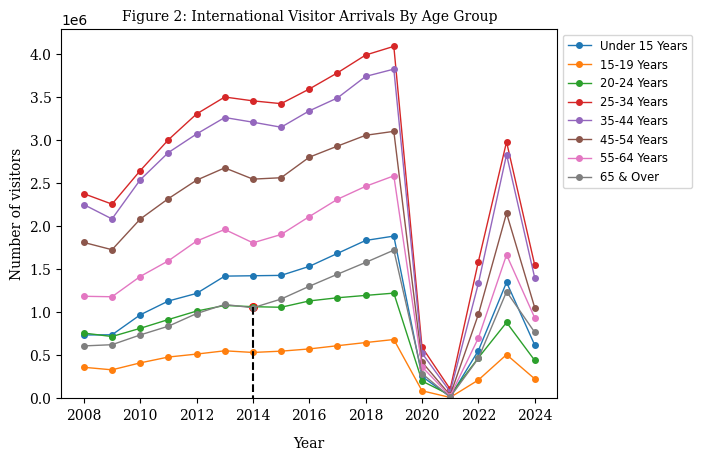

In [15]:
# Plotting
plt.figure(figsize=(12,5))
df1.plot(linewidth=1.0,marker='o', linestyle='-', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],markersize=4);

# set ticks and labels 
plt.xticks(fontsize=10, fontweight='normal', fontfamily='serif',style='normal')
plt.yticks(fontsize=10, fontweight='normal', fontfamily='serif',style='normal')
plt.ylim(bottom=0)
plt.legend(loc='best', fontsize='small',bbox_to_anchor=(1, 1))
plt.xlabel('Year',fontsize=10, fontweight='normal', fontfamily='serif',style='normal',labelpad=10)
plt.ylabel('Number of visitors',fontsize=10, fontweight='normal', fontfamily='serif',style='normal')
plt.title('Figure 2: International Visitor Arrivals By Age Group',fontsize=10, fontweight='normal', fontfamily='serif',style='normal')#title
mark_i=2014
mark_v=df1.iloc[6,2]
plt.scatter(mark_i,mark_v,s=30,color='r')
plt.plot([mark_i,mark_i],[mark_v,0],'k--')# k-- means black line is --type
plt.show();

#### Findings 2 
The overall trend for each age group has been upward. From 2008 to 2019, the growth was relatively stable with only minor fluctuation.  However, the COVID-19 pandemic caused a sharp decline between 2019 an 2022.  Visitor numbers began to recover in 2023, but have not yet returned to the peak levels of 2019.

#### Findings 3 
For the age group '65 and over', the number of visitors began to exceed that of the '20-24 years' group starting in 2014. However, when examining these two groups on a quarterly and monthly basis, some interesting phenomena can be observed. In certain specific quarters and months, the '20-24 years' group still has higher numbers than the '65 and over' group.

## 3.2 Quarterly trend

In [19]:
#Prepare the data for plotting
df2=df.groupby([df.index.to_period('Q')])[['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']].sum()

<Figure size 1000x400 with 0 Axes>

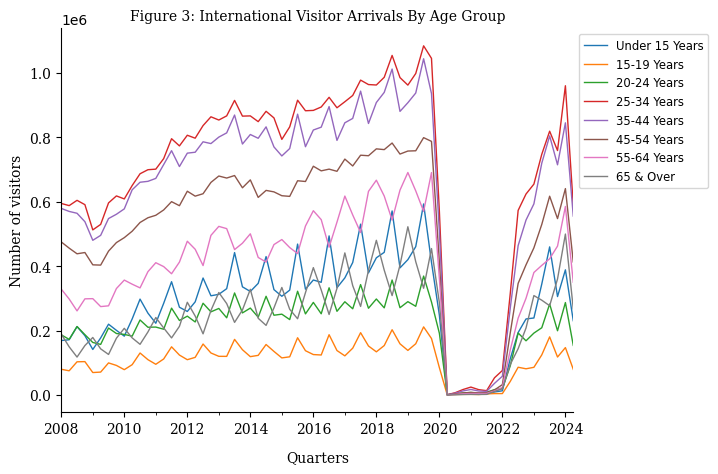

In [20]:
#plot
plt.figure(figsize=(10,4))
df2.plot(linewidth=1.0, linestyle='-', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],markersize=4);

#set the xais
gcas=plt.gca()
gcas.spines['right'].set_color('none')
gcas.spines['top'].set_color('none')
gcas.xaxis.set_ticks_position('bottom')
gcas.yaxis.set_ticks_position('left')

# set ticks and lables
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.xticks(fontsize=10, fontweight='normal', fontfamily='serif',style='normal')
plt.yticks(fontsize=10, fontweight='normal', fontfamily='serif',style='normal')
plt.legend(loc='best', fontsize='small',bbox_to_anchor=(1, 1))
plt.xlabel('Quarters',fontsize=10, fontweight='normal', fontfamily='serif',style='normal',labelpad=10)
plt.ylabel('Number of visitors',fontsize=10, fontweight='normal', fontfamily='serif',style='normal')
plt.title('Figure 3: International Visitor Arrivals By Age Group',fontsize=10, fontweight='normal', fontfamily='serif',style='normal')#title
plt.savefig('my_plot.png')
plt.show()

## 3.3 Monthly trend

In [22]:
#Prepare the data for plotting
df3=df.groupby([df.Month])[['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']].sum()

<Figure size 1500x500 with 0 Axes>

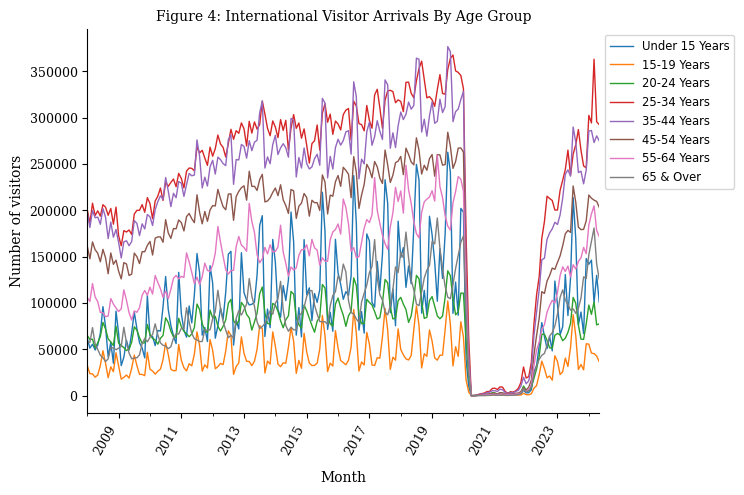

In [23]:
plt.figure(figsize=(15,5))
df3.plot(linewidth=1.0, linestyle='-', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],markersize=4);

#set the axis
gcas=plt.gca()
gcas.spines['right'].set_color('none')
gcas.spines['top'].set_color('none')
gcas.xaxis.set_ticks_position('bottom')
gcas.yaxis.set_ticks_position('left')

#set the ticks and labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.xticks(fontsize=9, fontweight='normal', fontfamily='serif',style='normal',rotation=60, ha='right')
plt.yticks(fontsize=9, fontweight='normal', fontfamily='serif',style='normal')
plt.legend(loc='best', fontsize='small',bbox_to_anchor=(1, 1))
plt.xlabel('Month',fontsize=10, fontweight='normal', fontfamily='serif',style='normal',labelpad=10)
plt.ylabel('Number of visitors',fontsize=10, fontweight='normal', fontfamily='serif',style='normal')
plt.title('Figure 4: International Visitor Arrivals By Age Group',fontsize=10, fontweight='normal', fontfamily='serif',style='normal')#title
plt.show()

# 4、Changing Point: '20-24 Years'  VS  '65 & Over' 

In [25]:
#Prepare the data for plotting
df5=df2.iloc[:64]
df_vs=df5[['20-24 Years','65 & Over']]

df_Q1=df_vs[df5.index.astype(str).str[-2:]=='Q1']
df_Q2=df_vs[df5.index.astype(str).str[-2:]=='Q2']
df_Q3=df_vs[df5.index.astype(str).str[-2:]=='Q3']
df_Q4=df_vs[df5.index.astype(str).str[-2:]=='Q4']
x=df_Q1.index.year
y1=df_Q1['20-24 Years']
y2=df_Q1['65 & Over']
y3=df_Q2['20-24 Years']
y4=df_Q2['65 & Over']
y5=df_Q3['20-24 Years']
y6=df_Q3['65 & Over']
y7=df_Q4['20-24 Years']
y8=df_Q4['65 & Over']

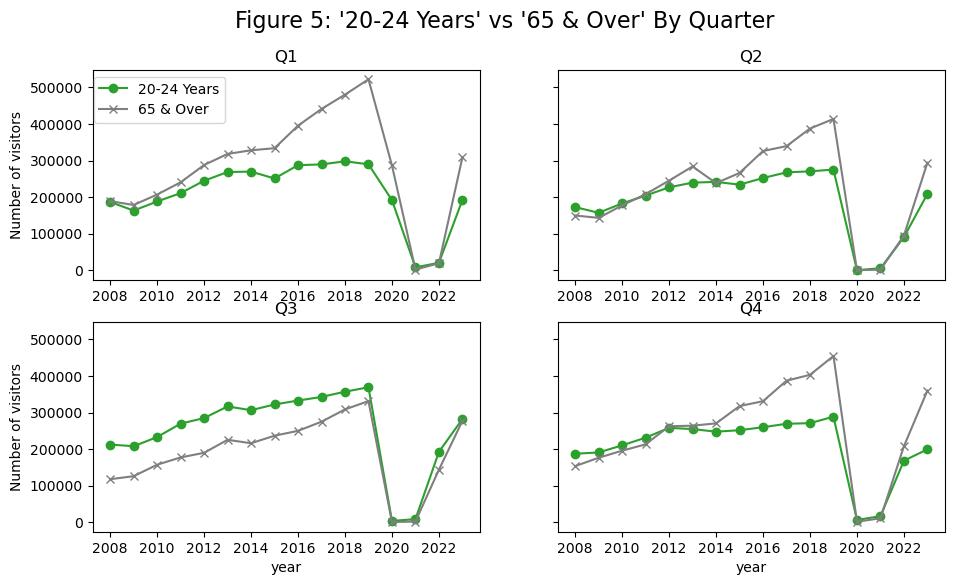

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6), sharey=True)
fig.suptitle("Figure 5: '20-24 Years' vs '65 & Over' By Quarter", fontsize=16)
# 4 plots of 4 Quaters
plt.subplot(2,2,1)
plt.plot(x, y1, label='20-24 Years', marker='o',color='#2ca02c')
plt.plot(x, y2, label='65 & Over', marker='x',color='#7f7f7f')
plt.title('Q1')
plt.legend(bbox_to_anchor=(0.36, 1.0))
plt.ylabel('Number of visitors')

plt.subplot(2,2,2)
plt.plot(x, y3, label='20-24 Years', marker='o',color='#2ca02c')
plt.plot(x, y4, label='65 & Over', marker='x',color='#7f7f7f')
plt.title('Q2')

plt.subplot(2,2,3)
plt.plot(x, y5, label='20-24 Years', marker='o',color='#2ca02c')
plt.plot(x, y6, label='65 & Over', marker='x',color='#7f7f7f')
plt.title('Q3')
plt.xlabel('year')
plt.ylabel('Number of visitors')

plt.subplot(2,2,4)
plt.plot(x, y7, label='20-24 Years', marker='o',color='#2ca02c')
plt.plot(x, y8, label='65 & Over', marker='x',color='#7f7f7f')
plt.title('Q4')
plt.xlabel('year')

plt.show()

In [27]:
# find the changing point from data
print(df1[df1['65 & Over']>df1['20-24 Years']].index)

Index([2013, 2015, 2016, 2017, 2018, 2019, 2020, 2023, 2024], dtype='int32', name='Year')


In [28]:
# find the changing point from data
print(df2[df2['65 & Over']>df2['20-24 Years']].index)

PeriodIndex(['2008Q1', '2009Q1', '2010Q1', '2011Q1', '2011Q2', '2012Q1',
             '2012Q2', '2012Q4', '2013Q1', '2013Q2', '2013Q4', '2014Q1',
             '2014Q4', '2015Q1', '2015Q2', '2015Q4', '2016Q1', '2016Q2',
             '2016Q4', '2017Q1', '2017Q2', '2017Q4', '2018Q1', '2018Q2',
             '2018Q4', '2019Q1', '2019Q2', '2019Q4', '2020Q1', '2022Q2',
             '2022Q4', '2023Q1', '2023Q2', '2023Q4', '2024Q1', '2024Q2'],
            dtype='period[Q-DEC]')


# 5、Seasonal Patterns Across Different Age Groups

In [30]:
#Prepare the data for plotting
df2=df.groupby([df.index.to_period('Q')])[['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']].sum()
dfs=df2.iloc[:64]
dfs=dfs.groupby(dfs.index.astype(str).str[-2:])[['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']].mean()

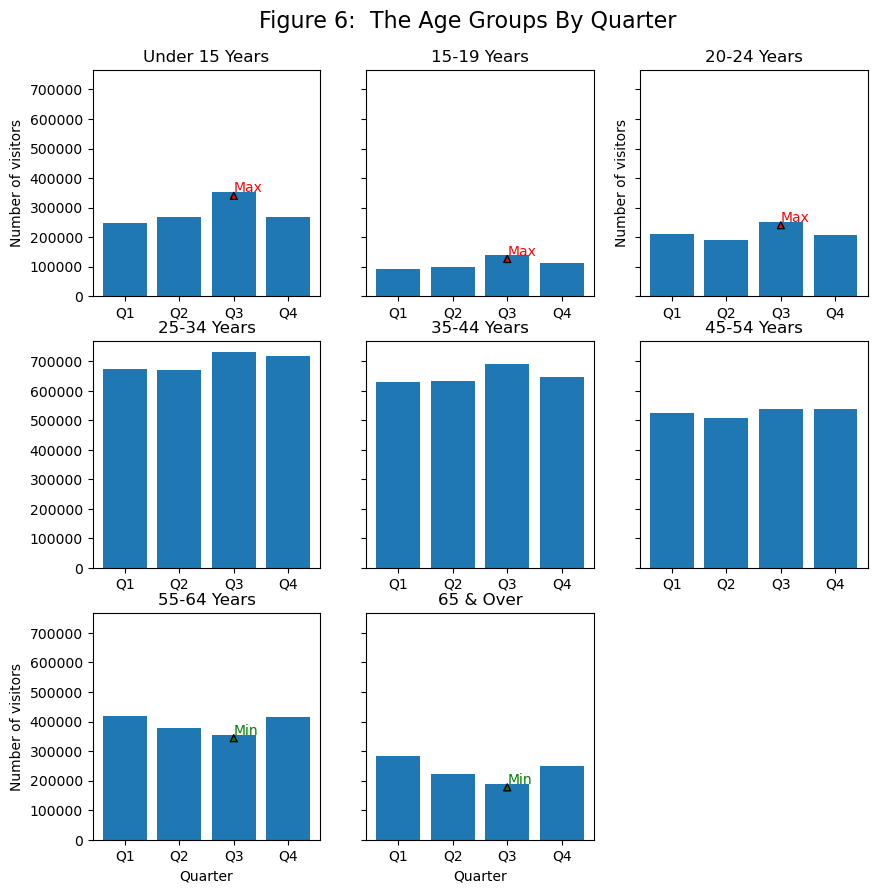

In [31]:
#Plot
xs=dfs.index
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharey=True)
fig.suptitle("Figure 6:  The Age Groups By Quarter", fontsize=16,y=0.94)
plt.subplot(3,3,1)
plt.bar(xs,height=dfs['Under 15 Years'])
plt.title('Under 15 Years')
plt.xticks(xs)
plt.ylabel('Number of visitors')

max_i1=dfs['Under 15 Years'].idxmax()
max_v1=dfs['Under 15 Years'].max()
plt.annotate(f'Max', xy=(max_i1, max_v1), xytext=(max_i1, max_v1 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')

plt.subplot(3,3,2)
plt.bar(xs,height=dfs['15-19 Years'])
plt.title('15-19 Years')
max_i2=dfs['15-19 Years'].idxmax()
max_v2=dfs['15-19 Years'].max()
plt.annotate(f'Max', xy=(max_i2, max_v2), xytext=(max_i2, max_v2 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')


plt.subplot(3,3,3)
plt.bar(xs,height=dfs['20-24 Years'])
plt.title('20-24 Years')
max_i3=dfs['20-24 Years'].idxmax()
max_v3=dfs['20-24 Years'].max()
plt.annotate(f'Max', xy=(max_i3, max_v3), xytext=(max_i3, max_v3 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')
plt.ylabel('Number of visitors')

plt.subplot(3,3,4)
plt.bar(xs,height=dfs['25-34 Years'])
plt.title('25-34 Years')

plt.subplot(3,3,5)
plt.bar(xs,height=dfs['35-44 Years'])
plt.title('35-44 Years')

plt.subplot(3,3,6)
plt.bar(xs,height=dfs['45-54 Years'])
plt.title('45-54 Years')

plt.subplot(3,3,7)
plt.bar(xs,height=dfs['55-64 Years'])
plt.title('55-64 Years')
min_i1=dfs['55-64 Years'].idxmin()
min_v1=dfs['55-64 Years'].min()
plt.annotate(f'Min', xy=(min_i1, min_v1), xytext=(min_i1, min_v1),
             arrowprops=dict(facecolor='green', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='green')
plt.xlabel('Quarter')
plt.ylabel('Number of visitors')

plt.subplot(3,3,8)
plt.bar(xs,height=dfs['65 & Over'])
plt.title('65 & Over')
min_i2=dfs['65 & Over'].idxmin()
min_v2=dfs['65 & Over'].min()
plt.annotate(f'Min', xy=(min_i2, min_v2), xytext=(min_i2, min_v2),
             arrowprops=dict(facecolor='green', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='green')
plt.xlabel('Quarter')

axs[2, 2].axis('off')
plt.show()

#### Findings 4 
In the age groups under 24, Q3 is the season with the highest number of visitors, whereas in the older age groups more than 55, Q3 is the season with the lowest number of visitors. And in the age groups 25-54, visitor numbers are evenly spread across each season and show minimal fluctuation.

Younger individuals might take advantage of the summer vacation for travel and leisure activities, leading to higher visitor numbers. In contrast, older adults might prefer to visit Singapore during Q1 and Q4 when the weather is warmer that their own countries.

# 6、Monthly Patterns Across Different Age Groups

In [34]:
#Prepare the data for plotting
df2=df.groupby([df.index.month])[['Under 15 Years','15-19 Years','20-24 Years','25-34 Years','35-44 Years','45-54 Years','55-64 Years','65 & Over']].sum()
dfm=df2.iloc[:64]

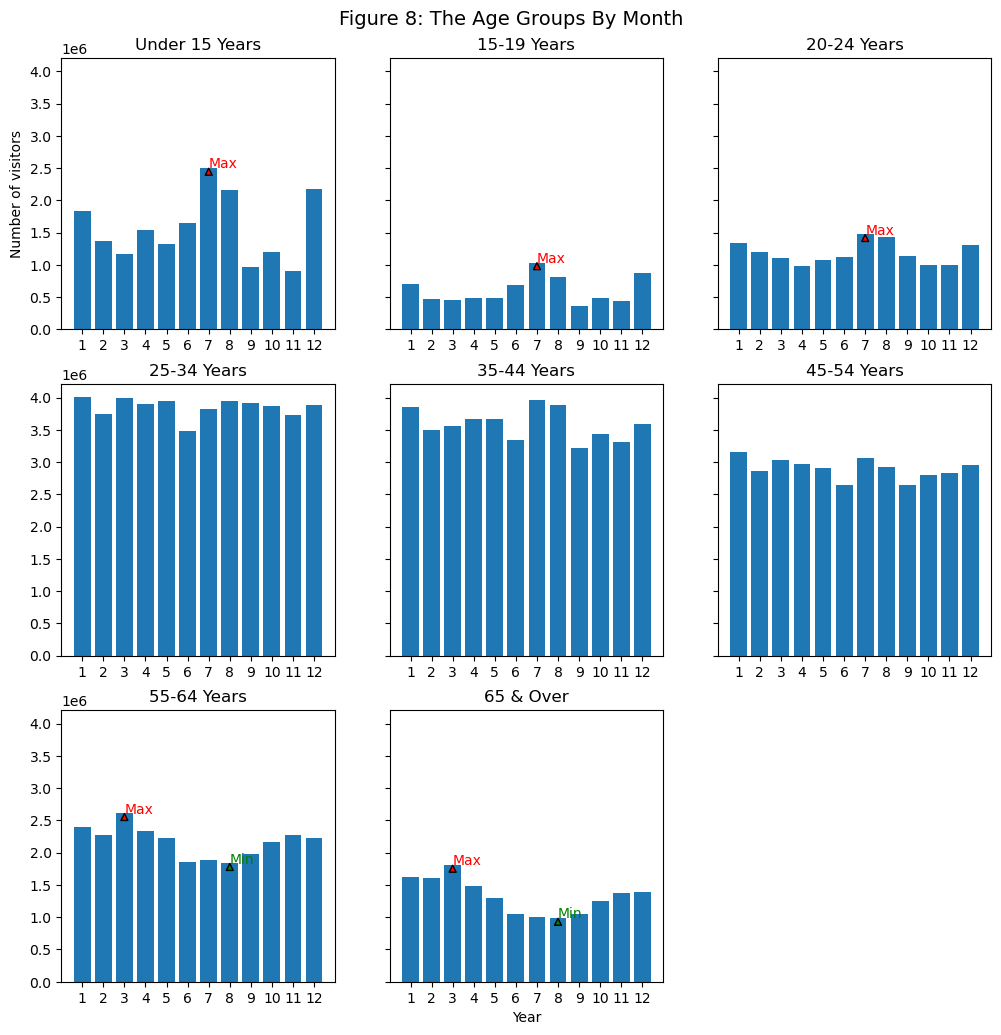

In [35]:
#Plot
xm=dfm.index
fig, axs = plt.subplots(3, 3, figsize=(12, 12),  sharey=True)
fig.suptitle("Figure 8: The Age Groups By Month", fontsize=14,y=0.92)
plt.subplot(3, 3,1)
plt.bar(xm,height=dfm['Under 15 Years'])
plt.title('Under 15 Years')
plt.xticks(xm)
plt.ylabel('Number of visitors')
max_i1=dfm['Under 15 Years'].idxmax()
max_v1=dfm['Under 15 Years'].max()
plt.annotate(f'Max', xy=(max_i1, max_v1), xytext=(max_i1, max_v1 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')

plt.subplot(3, 3,2)
plt.bar(xm,height=dfm['15-19 Years'])
plt.title('15-19 Years')
plt.xticks(xm)
max_i2=dfm['15-19 Years'].idxmax()
max_v2=dfm['15-19 Years'].max()
plt.annotate(f'Max', xy=(max_i2, max_v2), xytext=(max_i2, max_v2 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')

plt.subplot(3, 3,3)
plt.bar(xm,height=dfm['20-24 Years'])
plt.title('20-24 Years')
plt.xticks(xm)
max_i3=dfm['20-24 Years'].idxmax()
max_v3=dfm['20-24 Years'].max()
plt.annotate(f'Max', xy=(max_i3, max_v3), xytext=(max_i3, max_v3 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')

plt.subplot(3, 3,4)
plt.bar(xm,height=dfm['25-34 Years'])
plt.title('25-34 Years')
plt.xticks(xm)

plt.subplot(3,3,5)
plt.bar(xm,height=dfm['35-44 Years'])
plt.title('35-44 Years')
plt.xticks(xm)

plt.subplot(3,3,6)
plt.bar(xm,height=dfm['45-54 Years'])
plt.title('45-54 Years')
plt.xticks(xm)

plt.subplot(3,3,7)
plt.bar(xm,height=dfm['55-64 Years'])
plt.title('55-64 Years')
plt.xticks(xm)
max_i7=dfm['55-64 Years'].idxmax()
max_v7=dfm['55-64 Years'].max()
plt.annotate(f'Max', xy=(max_i7, max_v7), xytext=(max_i7, max_v7 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')
min_i7=dfm['55-64 Years'].idxmin()
min_v7=dfm['55-64 Years'].min()
plt.annotate(f'Min', xy=(min_i7, min_v7), xytext=(min_i7, min_v7),
             arrowprops=dict(facecolor='green', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='green')

plt.subplot(3,3,8)
plt.bar(xm,height=dfm['65 & Over'])
plt.title('65 & Over')
plt.xticks(xm)
max_i8=dfm['65 & Over'].idxmax()
max_v8=dfm['65 & Over'].max()
plt.annotate(f'Max', xy=(max_i8, max_v8), xytext=(max_i8, max_v8 +20),
             arrowprops=dict(facecolor='red', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')
min_i8=dfm['65 & Over'].idxmin()
min_v8=dfm['65 & Over'].min()
plt.annotate(f'Min', xy=(min_i8, min_v8), xytext=(min_i8, min_v8),
             arrowprops=dict(facecolor='green', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='green')
plt.xlabel('Year')

axs[2, 2].axis('off')
plt.show()
